In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

In [2]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [3]:
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [4]:
X_test = testing_data
y_test = []
display(X_test.shape, X_test.head(), y_test)

(1459, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

# OLS starts here

In [5]:
OLS_model = OLS(y_train, X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1332.
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:06:02   Log-Likelihood:                         -17307.
No. Observations:                1460   AIC:                                  3.468e+04
Df Residuals:                    1425   BIC:                                  3.487e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.0568      2.167     -0.488      0.626      -5.308       3.194
MSSubClass     -166.8371     26.451     -6.307      0.000    -218.724    -114.951
LotFrontage       8.8298     28.512      0.310      0.757     -47.100      64.760
LotArea           0.3925      0.100      3.931      0.000       0.197       0.588
OverallQual    1.729e+04   1179.488     14.662      0.000     1.5e+04    1.96e+04
OverallCond    5109.4769   1022.193      4.999      0.000    3104.313    7114.641
YearBuilt       339.6431     60.251      5.637      0.000     221.452     457.834
YearRemodAdd    122.0988     66.001      1.850      0.065      -7.370     251.568
MasVnrArea       28.0527      5.916      4.742      0.000      16.447      39.658
BsmtFinSF1        9.5685      2.507      3.816      0.000       4.650      14.487
BsmtFinSF2        0.0461      4.471      0.010      0.992      -8.725       8.817
BsmtUnfSF        -0.5535      2.393     -0.231      0.817      -5.247       4.140
TotalBsmtSF       9.0612      3.340      2.713      0.007       2.509      15.614
1stFlrSF         18.6226      6.087      3.060      0.002       6.683      30.562
2ndFlrSF         19.8636      5.639      3.523      0.000       8.802      30.925
LowQualFinSF    -10.2370     14.713     -0.696      0.487     -39.099      18.625
GrLivArea        28.2492      5.626      5.021      0.000      17.213      39.286
BsmtFullBath   8488.2641   2587.626      3.280      0.001    3412.299    1.36e+04
BsmtHalfBath   1744.1045   4051.195      0.431      0.667   -6202.842    9691.051
FullBath       3175.5834   2794.370      1.136      0.256   -2305.936    8657.103
HalfBath      -1945.9578   2639.345     -0.737      0.461   -7123.376    3231.461
BedroomAbvGr  -1.026e+04   1679.257     -6.111      0.000   -1.36e+04   -6967.881
KitchenAbvGr  -1.583e+04   5189.430     -3.051      0.002    -2.6e+04   -5652.156
TotRmsAbvGrd   5014.9160   1227.193      4.086      0.000    2607.617    7422.215
Fireplaces     4082.7314   1756.769      2.324      0.020     636.600    7528.862
GarageYrBlt     -14.5761      2.682     -5.434      0.000     -19.838      -9.314
GarageCars     1.572e+04   2971.965      5.288      0.000    9885.757    2.15e+04
GarageArea        4.9542      9.712      0.510      0.610     -14.098      24.006
WoodDeckSF       25.6914      7.918      3.245      0.001      10.159      41.224
OpenPorchSF      -6.0518     15.037     -0.402      0.687     -35.548      23.445
EnclosedPorch    11.8483     16.695      0.710      0.478     -20.901      44.597
3SsnPorch        19.9726     31.117      0.642      0.521     -41.067      81.012
ScreenPorch      57.6141     17.031      3.383      0.001      24.206      91.023
PoolArea        -31.6704     23.

# OLS Model Prediction for 50% of missing housing data

In [6]:
OLS_y_prediction = OLS_model.predict(X_test)
OLS_y_prediction.head(10)

0    119200.767332
1    151923.475793
2    172606.277003
3    199960.528299
4    194639.025564
5    181726.200135
6    198068.636800
7    169915.927191
8    206903.596145
9    116041.966118
dtype: float64

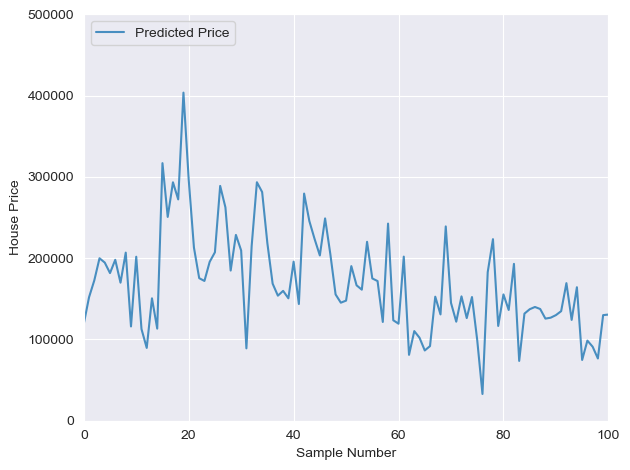

In [7]:
cmn.plot_observed_vs_predicted(predicted=OLS_y_prediction.to_numpy())

# Reverse OLS 50:50 split to verify that the prediction is correct

In [8]:
OLS_model_reverse = OLS(OLS_y_prediction, X_test).fit()
OLS_model_reverse_prediction = OLS_model.predict(X_train)
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1332.
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:06:03   Log-Likelihood:                         -17307.
No. Observations:                1460   AIC:                                  3.468e+04
Df Residuals:                    1425   BIC:                                  3.487e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.0568      2.167     -0.488      0.626      -5.308       3.194
MSSubClass     -166.8371     26.451     -6.307      0.000    -218.724    -114.951
LotFrontage       8.8298     28.512      0.310      0.757     -47.100      64.760
LotArea           0.3925      0.100      3.931      0.000       0.197       0.588
OverallQual    1.729e+04   1179.488     14.662      0.000     1.5e+04    1.96e+04
OverallCond    5109.4769   1022.193      4.999      0.000    3104.313    7114.641
YearBuilt       339.6431     60.251      5.637      0.000     221.452     457.834
YearRemodAdd    122.0988     66.001      1.850      0.065      -7.370     251.568
MasVnrArea       28.0527      5.916      4.742      0.000      16.447      39.658
BsmtFinSF1        9.5685      2.507      3.816      0.000       4.650      14.487
BsmtFinSF2        0.0461      4.471      0.010      0.992      -8.725       8.817
BsmtUnfSF        -0.5535      2.393     -0.231      0.817      -5.247       4.140
TotalBsmtSF       9.0612      3.340      2.713      0.007       2.509      15.614
1stFlrSF         18.6226      6.087      3.060      0.002       6.683      30.562
2ndFlrSF         19.8636      5.639      3.523      0.000       8.802      30.925
LowQualFinSF    -10.2370     14.713     -0.696      0.487     -39.099      18.625
GrLivArea        28.2492      5.626      5.021      0.000      17.213      39.286
BsmtFullBath   8488.2641   2587.626      3.280      0.001    3412.299    1.36e+04
BsmtHalfBath   1744.1045   4051.195      0.431      0.667   -6202.842    9691.051
FullBath       3175.5834   2794.370      1.136      0.256   -2305.936    8657.103
HalfBath      -1945.9578   2639.345     -0.737      0.461   -7123.376    3231.461
BedroomAbvGr  -1.026e+04   1679.257     -6.111      0.000   -1.36e+04   -6967.881
KitchenAbvGr  -1.583e+04   5189.430     -3.051      0.002    -2.6e+04   -5652.156
TotRmsAbvGrd   5014.9160   1227.193      4.086      0.000    2607.617    7422.215
Fireplaces     4082.7314   1756.769      2.324      0.020     636.600    7528.862
GarageYrBlt     -14.5761      2.682     -5.434      0.000     -19.838      -9.314
GarageCars     1.572e+04   2971.965      5.288      0.000    9885.757    2.15e+04
GarageArea        4.9542      9.712      0.510      0.610     -14.098      24.006
WoodDeckSF       25.6914      7.918      3.245      0.001      10.159      41.224
OpenPorchSF      -6.0518     15.037     -0.402      0.687     -35.548      23.445
EnclosedPorch    11.8483     16.695      0.710      0.478     -20.901      44.597
3SsnPorch        19.9726     31.117      0.642      0.521     -41.067      81.012
ScreenPorch      57.6141     17.031      3.383      0.001      24.206      91.023
PoolArea        -31.6704     23.

In [9]:
pd.DataFrame(OLS_model_reverse_prediction).to_csv(f"{cmn.export_data_path}OLS.csv")

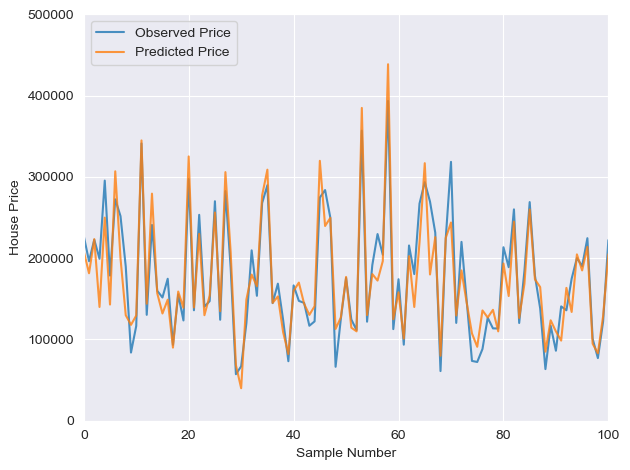

In [10]:
cmn.plot_observed_vs_predicted(observed=OLS_model_reverse_prediction.to_numpy(), predicted=y_train.to_numpy())

## Correlation Graph for OLS after prediction

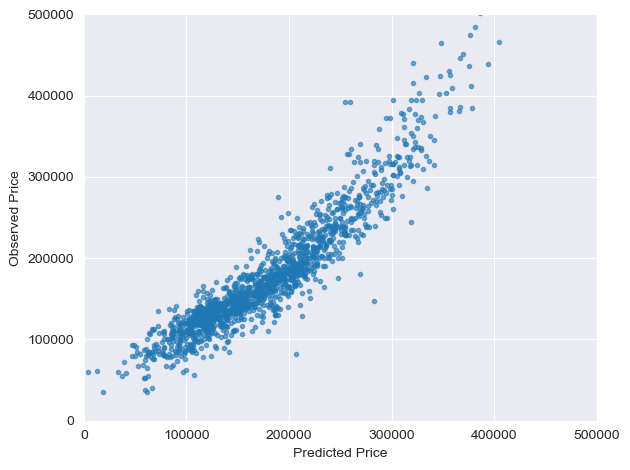

In [11]:
cmn.plot_single_scatter(predicted=OLS_model_reverse_prediction.to_numpy(), observed=y_train.to_numpy())